In [49]:
import scanpy as sc
import yaml
from itertools import chain

In [50]:
with open(r'../annotation/lin_processed/lin_cycif-markers-v2.yml') as file:
    markers = yaml.full_load(file)

markers = markers['cell_types']


In [51]:
rel_markers = list(set(list(chain(*markers.values()))))

In [52]:
adata = sc.read_h5ad("../data/lin-cycif-subset.h5ad")

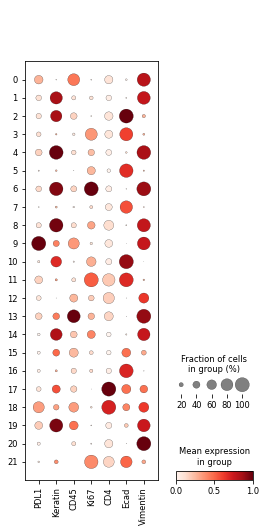

In [56]:
sc.pl.dotplot(adata, var_names=rel_markers, groupby="leiden", standard_scale='var')

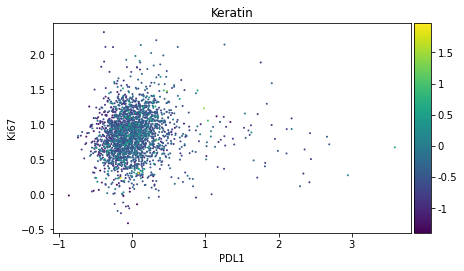

In [82]:
sc.pl.scatter(adata[adata.obs.leiden == '11',:], x='PDL1',y='Ki67', color='Keratin', size=16)

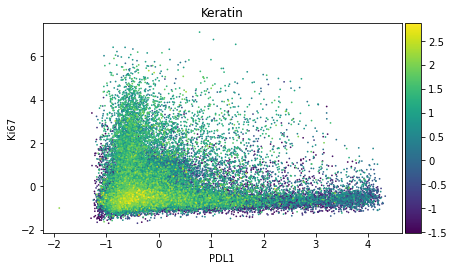

In [77]:
sc.pl.scatter(adata, x='PDL1',y='Ki67', color='Keratin', size=12)

In [83]:
# cluster_mapping = {
#     'Treg': ['16','18'],
#     'Epithelial': ['14','3', '2', '8'],
#     'Other immune': ['1', '12'],
#     'Epithelial proliferative': ['6'],
#     'Stromal': ['17'],
#     'Unclear': ['20', '12'],
#     'Epithelial I-P': ['7']
# }

cluster_mapping = {
    'Treg': ['17', '18'],
    'Epithelial': ['2', '7', '16', '5'],
    'Other immune': ['0', '13'],
    'Epithelial proliferative': ['3', '6', '10'],
    'Stromal': ['20'],
    'Unclear': ['15','21'],
    'Epithelial I-P': ['11'],
    'Epithelial immunosuppressive': ['19']
}


inverse_mapping = {i: k for k,v in cluster_mapping.items() for i in v}

In [84]:
inverse_mapping

{'17': 'Treg',
 '18': 'Treg',
 '2': 'Epithelial',
 '7': 'Epithelial',
 '16': 'Epithelial',
 '5': 'Epithelial',
 '0': 'Other immune',
 '13': 'Other immune',
 '3': 'Epithelial proliferative',
 '6': 'Epithelial proliferative',
 '10': 'Epithelial proliferative',
 '20': 'Stromal',
 '15': 'Unclear',
 '21': 'Unclear',
 '11': 'Epithelial I-P',
 '19': 'Epithelial immunosuppressive'}

In [85]:
obs = adata.obs[['cell_id', 'leiden']]

In [86]:
obs = obs.loc[obs.leiden.isin(inverse_mapping.keys())]

In [87]:
cell_types = [inverse_mapping[i] for i in obs.leiden]

In [88]:
obs['cell_type'] = cell_types

In [89]:
obs.set_index('cell_id').to_csv("../data/lin-clusters.tsv", sep="\t")